<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0f7a7a; overflow:hidden"><b>Complete NLP Pipeline</b></div>

#### So hello guys this is my first notebook on NLP where I tried to illustrate  all preprocessing steps in NLP so If this helped in your learning, then please SUPPORT – as they are the source of motivation! Also if you find any flaw so kindly drop in the comment I will try my best to clear these
#### Happy Learning

### NLP (Natural Language Processing) pipeline typically involves several stages to transform raw text data into meaningful insights or actions. Here's an expanded explanation of each step involved in a typical NLP pipeline:

### 1. Text Acquisition
This is the initial step where you gather the text data from various sources such as websites, social media, documents, or databases.

### 2. Text Preprocessing
Preprocessing is crucial to clean and normalize the text data before analysis. This step involves several sub-tasks:

- **Tokenization**: Splitting the text into individual words or tokens. For example, "Hello world!" becomes ["Hello", "world", "!"].
- **Lowercasing**: Converting all characters to lowercase to ensure uniformity (e.g., "Hello" and "hello" are treated the same).
- **Removing Punctuation**: Eliminating punctuation marks since they often do not contribute to the meaning.
- **Stop Words Removal**: Removing common words like "and", "the", "is", which do not carry significant meaning.
- **Lemmatization**: Converting words to their base or root form (e.g., "running" becomes "run").
- **Stemming**: Similar to lemmatization, but usually more aggressive. It reduces words to their stem (e.g., "running" becomes "run", "runner" becomes "run").

### 3. Feature Extraction
This step transforms the text into numerical features that can be used by machine learning models.

- **Bag of Words (BoW)**: Represents text as a collection of words irrespective of grammar and order, giving each word a unique index.
- **TF-IDF (Term Frequency-Inverse Document Frequency)**: Measures the importance of a word in a document relative to the entire corpus.
- **Word Embeddings**: Converts words into dense vectors that capture semantic meaning. Examples include Word2Vec, GloVe, and FastText.

### 4. Model Training
Using the features extracted in the previous step, you can now train machine learning models. This could involve various NLP tasks such as:

- **Text Classification**: Assigning categories to text (e.g., spam detection, sentiment analysis).
- **Named Entity Recognition (NER)**: Identifying entities like names, dates, and locations in text.
- **Part-of-Speech (POS) Tagging**: Identifying grammatical parts of speech (nouns, verbs, adjectives, etc.).
- **Dependency Parsing**: Analyzing the grammatical structure of a sentence.
- **Machine Translation**: Translating text from one language to another.
- **Text Summarization**: Condensing a text into a shorter version while retaining its main points.

### 5. Model Evaluation
Assess the performance of the trained model using metrics like accuracy, precision, recall, F1-score, etc. This helps in understanding how well the model is performing on unseen data.

### 6. Model Deployment
Once the model is trained and evaluated, it can be deployed to make predictions on new, unseen text data. This could involve integrating the model into a web service, application, or other platforms.

### 7. Post-processing
Post-processing steps might include formatting the model's output to make it more interpretable or actionable. For example, in a sentiment analysis task, converting numerical predictions into labels like "Positive", "Negative", or "Neutral".

### 8. Feedback and Iteration
Finally, the model's performance is monitored over time, and the pipeline is iteratively improved based on feedback. This could involve retraining the model with new data, fine-tuning hyperparameters, or experimenting with different preprocessing techniques.

Below the complete NLP pipeline is mentioned, please zoom in your screen to read it clearly,

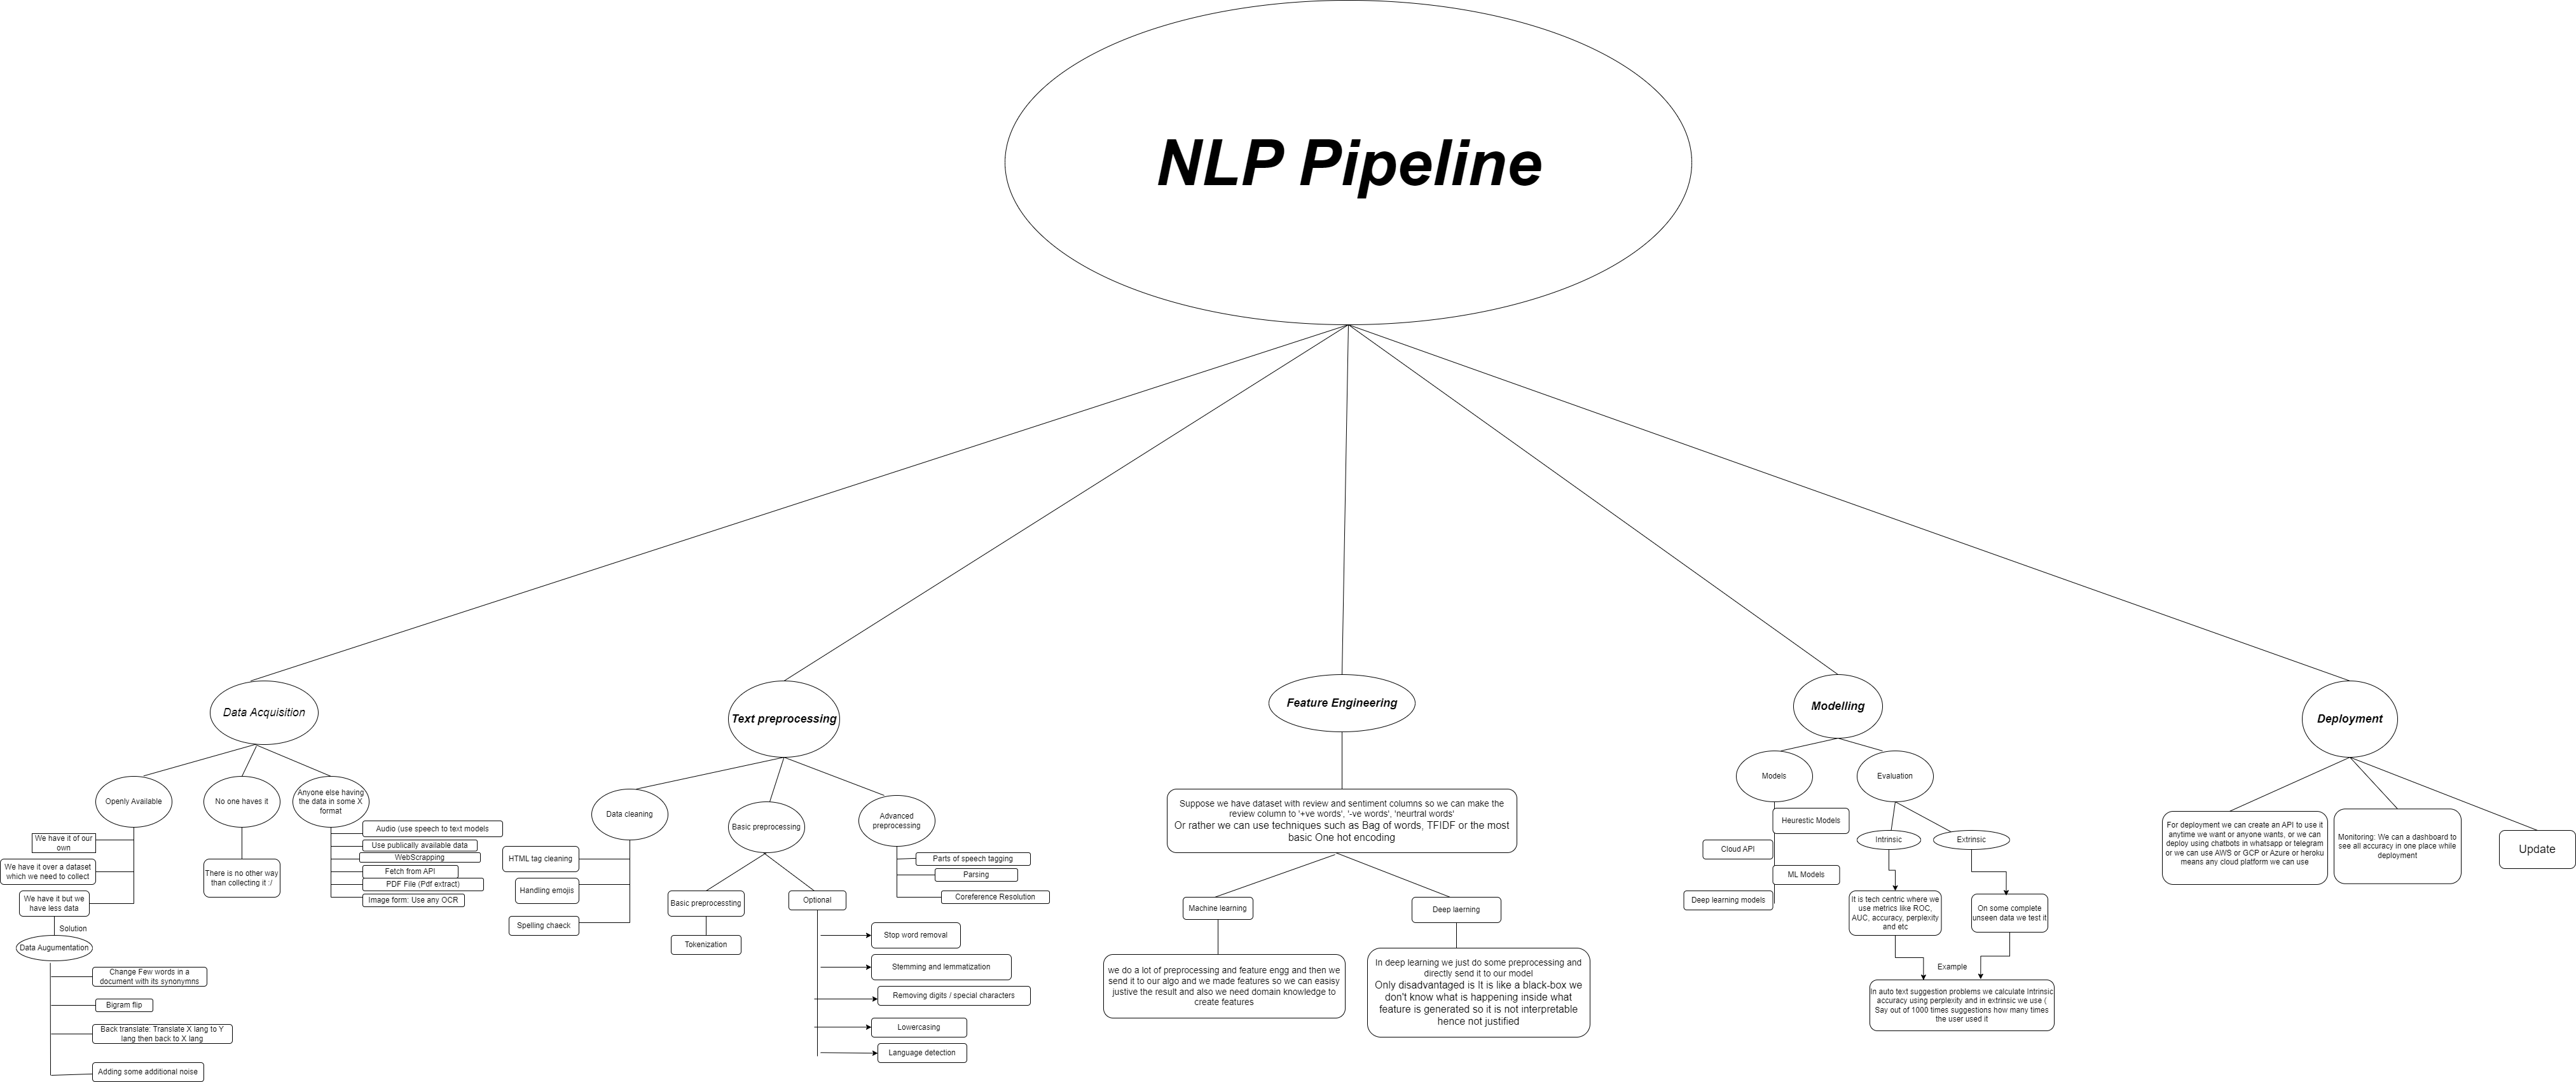

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0f7a7a; overflow:hidden"><b>Text Preprocessing
</b></div>



Text preprocessing is a crucial step in NLP, transforming raw text into a clean and structured format suitable for analysis. It involves tokenization, which splits text into individual words or phrases, and lowercasing to ensure uniformity. Removing punctuation and stopwords (common words like "and" or "the") reduces noise, while lemmatization converts words to their base forms, capturing their true meaning. Stemming, a more aggressive approach, also reduces words to their root forms. This process ensures that the text is standardized, facilitating accurate feature extraction and model training in subsequent steps of the NLP pipeline.

<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Lowercasing</div>


### If we consider an example: 'Okay, so now we will hang out together, as I was not okay with us hanging out together before.' In Python, which is a case-sensitive language, 'Okay' and 'okay' would be treated as different words during tokenization.

In [28]:
import pandas as pd
import numpy as np
df=pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [29]:
df['review'][100].lower()

"this short film that inspired the soon-to-be full length feature - spatula madness - is a hilarious piece that contends against similar cartoons yielding multiple writers. the short film stars edward the spatula who after being fired from his job, joins in the fight against the evil spoons. this premise allows for some funny content near the beginning, but is barely present for the remainder of the feature. this film's 15-minute running time is absorbed by some odd-ball comedy and a small musical number. unfortunately not much else lies below it. the plot that is set up doesn't really have time to show. but it's surely follows it plot better than many high-budget hollywood films. this film is worth watching at least a few times. take it for what it is, and don't expect a deep story."

In [30]:
df['review']=df['review'].str.lower()
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Remove html tags using Regular expressions</div>

In [31]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub('', text)

In [32]:
df['review']=df['review'].apply(remove_html_tags)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Removing URLs</div>

In [33]:
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

text='Checkout this webpage to learn more about deep learning https://www.deeplearning.ai/ai-notes/initialization/index.html'
remove_url(text)

'Checkout this webpage to learn more about deep learning '


<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Removing punchuation</div>

It matters in tokenization as these males document bekar mei large

In [34]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

##### These are the punchuations in python

In [35]:
exclude=string.punctuation
def remove_punc(text):
    for char in exclude:
        text=text.replace(char,'')
    return text

text='okay, so. this, is/ just a, text, with. punc'
remove_punc(text)

'okay so this is just a text with punc'

In [36]:
start=time.time()
print(remove_punc(text))
time1=time.time()-start
print(time1)

okay so this is just a text with punc
0.00013065338134765625


In [37]:
def remove_punc1(text):
    return text.translate(str.maketrans('','',exclude))
    
remove_punc(text)

'okay so this is just a text with punc'

In [38]:
start=time.time()
print(remove_punc1(text))
time1=time.time()-start
print(time1)

okay so this is just a text with punc
0.00010943412780761719



<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">GenZ Lingo treatment</div>

In [39]:
chat_word = {
    'AFAIK': 'As Far As I Know',
    'AFK': 'Away From Keyboard',
    'ASAP': 'As Soon As Possible',
    'ATK': 'At The Keyboard',
    'ATM': 'At The Moment',
    'A3': 'Anytime, Anywhere, Anyplace',
    'BAK': 'Back At Keyboard',
    'BBL': 'Be Back Later',
    'BBS': 'Be Back Soon',
    'BFN': 'Bye For Now',
    'B4N': 'Bye For Now',
    'BRB': 'Be Right Back',
    'BRT': 'Be Right There',
    'BTW': 'By The Way',
    'B4': 'Before',
    'CU': 'See You',
    'CUL8R': 'See You Later',
    'CYA': 'See You',
    'FAQ': 'Frequently Asked Questions',
    'FC': 'Fingers Crossed',
    'FWIW': "For What It's Worth",
    'FYI': 'For Your Information',
    'GAL': 'Get A Life',
    'GG': 'Good Game',
    'GN': 'Good Night',
    'GMTA': 'Great Minds Think Alike',
    'GR8': 'Great!',
    'G9': 'Genius',
    'IC': 'I See',
    'ICQ': 'I Seek you (also a chat program)',
    'ILU': 'ILU: I Love You',
    'IMHO': 'In My Honest/Humble Opinion',
    'IMO': 'In My Opinion',
    'IOW': 'In Other Words',
    'IRL': 'In Real Life',
    'KISS': 'Keep It Simple, Stupid',
    'LDR': 'Long Distance Relationship',
    'LMAO': 'Laugh My A.. Off',
    'LOL': 'Laughing Out Loud',
    'LTNS': 'Long Time No See',
    'L8R': 'Later',
    'MTE': 'My Thoughts Exactly',
    'M8': 'Mate',
    'NRN': 'No Reply Necessary',
    'OIC': 'Oh I See',
    'PITA': 'Pain In The A..',
    'PRT': 'Party',
    'PRW': 'Parents Are Watching',
    'QPSA?': 'Que Pasa?',
    'ROFL': 'Rolling On The Floor Laughing',
    'ROFLOL': 'Rolling On The Floor Laughing Out Loud',
    'ROTFLMAO': 'Rolling On The Floor Laughing My A.. Off',
    'SK8': 'Skate',
    'STATS': 'Your sex and age',
    'ASL': 'Age, Sex, Location',
    'THX': 'Thank You',
    'TTFN': 'Ta-Ta For Now!',
    'TTYL': 'Talk To You Later',
    'U': 'You',
    'U2': 'You Too',
    'U4E': 'Yours For Ever',
    'WB': 'Welcome Back',
    'WTF': 'What The F...',
    'WTG': 'Way To Go!',
    'WUF': 'Where Are You From?',
    'W8': 'Wait...',
    '7K': 'Sick:-D Laugher',
    'TFW': 'That feeling when',
    'MFW': 'My face when',
    'MRW': 'My reaction when',
    'IFYP': 'I feel your pain',
    'TNTL': 'Trying not to laugh',
    'JK': 'Just kidding',
    'IDC': "I don't care",
    'ILY': 'I love you',
    'IMU': 'I miss you',
    'ADIH': 'Another day in hell',
    'ZZZ': 'Sleeping, bored, tired',
    'WYWH': 'Wish you were here',
    'TIME': 'Tears in my eyes',
    'BAE': 'Before anyone else',
    'FIMH': 'Forever in my heart',
    'BSAAW': 'Big smile and a wink',
    'BWL': 'Bursting with laughter',
    'BFF': 'Best friends forever',
    'CSL': "Can't stop laughing"
}

In [40]:
def short_conv(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_word:
            new_text.append(chat_word[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)


short_conv("ASAP let me know please")

'As Soon As Possible let me know please'

<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Spelling correction</div>

In [41]:
from textblob import TextBlob

text=" ceertainli I dont kniw what is wrrong herre"
textblb=TextBlob(text)
textblb.correct().string

' certainly I dont know what is wrong here'


<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Removing StopWords</div>

##### Stop words are common words in a language that are often removed because they carry little semantic weight and can clutter analysis. These words include articles (e.g., "a", "the"), conjunctions (e.g., "and", "or"), prepositions (e.g., "in", "on"), and other frequently occurring terms that do not significantly contribute to the meaning of a sentence. By removing stop words, the focus shifts to more meaningful words that better represent the content of the text, improving the efficiency and accuracy of text analysis and machine learning models.

In [42]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
def remove_stopwords(text):
    new_text=[]
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
            
    x=new_text[:]
    new_text.clear()
    return " ".join(x)

text="I wasn't sure that this might happened"
remove_stopwords(text)

'I  sure   might happened'


<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Handling emojis</div>

#### Either remove or replace

In [44]:
# Removing
import re
def remove_emoji(text):
    emoji_pattern=re.compile("["
                             u"\U0001F600-\U0001F64F" #emoticons
                             u"\U0001F300-\U0001F5FF" #symbols, pictograph
                              u"\U0001F680-\U0001F6FF" #transport and map symbol
                              u"\U0001F1E0-\U0001F1FF" # flags(IOS)
                              u"\U00002702-\U000027B0"
                              u"\U00002FC2-\U0001F251"
                             "]+",flags=re.UNICODE)
    return emoji_pattern.sub(r'',text)

text="that is not so funny please stop 😭"
remove_emoji(text)

'that is not so funny please stop '

In [45]:
# Replace
import emoji
print(emoji.demojize(text))

that is not so funny please stop :loudly_crying_face:



<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Tokenization</div>

##### Tokenization is the most fundamental step in NLP that involves splitting text into smaller units called tokens, which can be words, phrases, or sentences. This process helps in converting the raw text into a structured format for analysis. There are different types of tokenization, including word tokenization (splitting text into individual words) and sentence tokenization (splitting text into sentences). Proper tokenization considers punctuation, spaces, and language-specific rules to accurately represent the text's structure and meaning, enabling more effective text processing and feature extraction in NLP tasks.

##### We will look at it using three ways
1. Python split
2. Regular expression
3. NLTK
4. Spacy

In [46]:
# Using split function
sent1="I am going to delhi"
sent1.split()

['I', 'am', 'going', 'to', 'delhi']

In [47]:
# Using split function
sent1="I am, going to delhi"
sent1.split(',')

['I am', ' going to delhi']

In [48]:
#peoblem where it fails, as it cannout seperate `!!!!!`
sent1="I am, going to delhi!!!"
sent1.split(',')

['I am', ' going to delhi!!!']

In [49]:
# Regular expression
import re
tokens=re.findall("[\w']+",sent1)
tokens

['I', 'am', 'going', 'to', 'delhi']

In [50]:
#NLTK
from nltk.tokenize import word_tokenize,sent_tokenize
word_tokenize(sent1)

['I', 'am', ',', 'going', 'to', 'delhi', '!', '!', '!']

In [51]:
sent2='I have a Ph.D in M.L'
sent3="We're here to help! mail us at xuz@gmail.com"

In [52]:
word_tokenize(sent2)

['I', 'have', 'a', 'Ph.D', 'in', 'M.L']

In [53]:
# fails at this sentence as it seperated email id on the basics of @
word_tokenize(sent3)

['We',
 "'re",
 'here',
 'to',
 'help',
 '!',
 'mail',
 'us',
 'at',
 'xuz',
 '@',
 'gmail.com']

In [54]:
#spacy
import spacy
nlp=spacy.load('en_core_web_sm')

doc1=nlp(sent1)
doc2=nlp(sent2)
doc3=nlp(sent3)

for token in doc2:
    print(token)

I
have
a
Ph
.
D
in
M.L


<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Stemming</div>

##### Stemming reduces words to their root or base form by removing suffixes. Unlike lemmatization, which relies on linguistic rules, stemming uses heuristic methods to strip affixes. For example, "running," "runner," and "ran" might all be reduced to "run." Common algorithms include the Porter Stemmer, which applies a series of rules to iteratively strip suffixes, and the Snowball Stemmer, which is an improved version of the Porter Stemmer. While stemming is faster and simpler than lemmatization, it can be less accurate, sometimes producing stems that are not actual words.

In [55]:
from nltk.stem.porter import PorterStemmer

ps=PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

sample="Walk walking walked walks"
stem_words(sample)

# sometimes root word is not even english word sometimes

'walk walk walk walk'

In [56]:
sample2='Stemming is a text preprocessing technique in NLP that reduces words to their root or base form by removing suffixes. Unlike lemmatization, which relies on linguistic rules, stemming uses heuristic methods to strip affixes. For example, "running," "runner," and "ran" might all be reduced to "run." Common algorithms include the Porter Stemmer, which applies a series of rules to iteratively strip suffixes, and the Snowball Stemmer, which is an improved version of the Porter Stemmer. While stemming is faster and simpler than lemmatization, it can be less accurate, sometimes producing stems that are not actual words.'
stem_words(sample2)

'stem is a text preprocess techniqu in nlp that reduc word to their root or base form by remov suffixes. unlik lemmatization, which reli on linguist rules, stem use heurist method to strip affixes. for example, "running," "runner," and "ran" might all be reduc to "run." common algorithm includ the porter stemmer, which appli a seri of rule to iter strip suffixes, and the snowbal stemmer, which is an improv version of the porter stemmer. while stem is faster and simpler than lemmatization, it can be less accurate, sometim produc stem that are not actual words.'

##### You can already see the disadvantage of using stemming as some words are not even english words so we should use stemming when we dont need to show the output to anyone, if we need to the we should go for lemmatization

<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Lemmatization</div>

##### Lemmatization reduces words to their base or root form, known as a lemma. Unlike stemming, which simply trims word endings, lemmatization considers the context and morphological analysis of words, ensuring that words are transformed into meaningful base forms. For instance, "running" becomes "run" and "better" becomes "good." This process helps in standardizing words, improving the accuracy of text analysis by grouping different inflected forms of a word into a single item. Lemmatization is essential for tasks like text classification, sentiment analysis, and information retrieval, as it enhances the quality of features extracted from the text.

In [57]:

import spacy

nlp = spacy.load('en_core_web_sm')

sentence = "The children were playing in the park, running and laughing as they enjoyed their freedom, unaware of the time passing quickly by."
doc = nlp(sentence)

print("Original Word - Lemmatized Word")
for token in doc:
    print(f"{token.text} - {token.lemma_}")



Original Word - Lemmatized Word
The - the
children - child
were - be
playing - play
in - in
the - the
park - park
, - ,
running - run
and - and
laughing - laugh
as - as
they - they
enjoyed - enjoy
their - their
freedom - freedom
, - ,
unaware - unaware
of - of
the - the
time - time
passing - pass
quickly - quickly
by - by
. - .


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0f7a7a; overflow:hidden"><b>One hot encoding
</b></div>

# One-hot encoding
#### One-hot encoding is a technique used to convert categorical data into a numerical format that can be used by machine learning algorithms. This method transforms each category value into a new binary column and assigns a 1 or 0 (True/False) to indicate the presence of that category in the data.

#### Example Dataset

Consider a small dataset with a single categorical feature "Color":

| ID | Color  |
|----|--------|
| 1  | Red    |
| 2  | Green  |
| 3  | Blue   |
| 4  | Green  |
| 5  | Blue   |
| 6  | Red    |

#### One-Hot Encoding

Using one-hot encoding, we create new binary columns for each unique category in the "Color" feature:

| ID | Red | Green | Blue |
|----|-----|-------|------|
| 1  | 1   | 0     | 0    |
| 2  | 0   | 1     | 0    |
| 3  | 0   | 0     | 1    |
| 4  | 0   | 1     | 0    |
| 5  | 0   | 0     | 1    |
| 6  | 1   | 0     | 0    |


Each row now has a binary representation of the "Color" feature, making it suitable for machine learning algorithms that require numerical input. This transformation ensures that the categorical data is expressed in a format that maintains the uniqueness and relationship of each category without implying any ordinal relationship.

### Advantages and Disadvantages of One-Hot Encoding

#### Advantages

1. **Simplicity and Ease of Implementation**:
   - One-hot encoding is straightforward to implement and understand, making it a go-to method for converting categorical data into numerical format.

2. **No Ordinal Assumptions**:
   - Unlike label encoding, one-hot encoding does not impose any ordinal relationship between categories, preserving the true nature of categorical data.

3. **Compatibility with Machine Learning Algorithms**:
   - Many machine learning algorithms, especially those that rely on distance calculations (e.g., k-nearest neighbors, linear regression), perform better with one-hot encoded data.

4. **Avoidance of Bias**:
   - Since each category is represented independently, there is no inherent bias introduced by the encoding process.

#### Disadvantages

1. **High Dimensionality**:
   - One-hot encoding can lead to a significant increase in the number of features, especially when dealing with categorical variables with many unique values. This high dimensionality can make the model computationally expensive and harder to train.

2. **Sparse Data**:
   - The resulting one-hot encoded data is sparse, containing many zeros. Sparse matrices can lead to inefficiencies in storage and processing.

3. **Curse of Dimensionality**:
   - The increase in dimensionality can lead to the curse of dimensionality, where the performance of machine learning algorithms degrades with the addition of too many features.

4. **Scalability Issues**:
   - For large datasets with high cardinality categorical variables, one-hot encoding may not be scalable and can result in memory and computational challenges.

5. **Irrelevance in Some Algorithms**:
   - Some machine learning algorithms, like decision trees, do not benefit from one-hot encoding as they can handle categorical data directly.


In [58]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = {
    'ID': [1, 2, 3, 4, 5],
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Blue']
}

df = pd.DataFrame(data)

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['Color']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Color']))
final_df = pd.concat([df, encoded_df], axis=1)

print("Original DataFrame:")
print(df)
print("\nOne-Hot Encoded DataFrame:")
print(final_df)


Original DataFrame:
   ID  Color
0   1    Red
1   2  Green
2   3   Blue
3   4  Green
4   5   Blue

One-Hot Encoded DataFrame:
   ID  Color  Color_Blue  Color_Green  Color_Red
0   1    Red         0.0          0.0        1.0
1   2  Green         0.0          1.0        0.0
2   3   Blue         1.0          0.0        0.0
3   4  Green         0.0          1.0        0.0
4   5   Blue         1.0          0.0        0.0



<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0f7a7a; overflow:hidden"><b>Bag of Words
</b></div>

# Bag of words

The core intuition behind the Bag of Words (BoW) model is that if our algorithm detects similar words occurring with similar frequencies, it will classify the documents as being in the same class. Here, the order of words and context do not matter; what matters is the presence and frequency of words.

In BoW, each word is represented as a coordinate in an n-dimensional space. If we set the binary parameter to `True`, any word that appears more than once is still treated as if it appears only once. Consequently, the coordinates will be binary, filled only with 0s and 1s.

### Example Data
| Index | Text                     | Output |
|-------|--------------------------|--------|
| D1    | People Follow Mr.Beast   | 1      |
| D2    | Mr.Beast Follow Mr.Beast | 1      |
| D3    | People Write comment     | 0      |
| D4    | Mr.Beast Write comment   | 0      |

### BoW with `binary=False`

| People | Follow | Mr.Beast | Write | Comment | Index |
|--------|--------|----------|-------|---------|-------|
| 1      | 1      | 1        | 0     | 0       | D1    |
| 0      | 1      | 2        | 0     | 0       | D2    |
| 1      | 0      | 0        | 1     | 1       | D3    |
| 0      | 0      | 1        | 1     | 1       | D4    |

### BoW with `binary=True`

| People | Follow | Mr.Beast | Write | Comment | Index |
|--------|--------|----------|-------|---------|-------|
| 1      | 1      | 1        | 0     | 0       | D1    |
| 0      | 1      | 1        | 0     | 0       | D2    |
| 1      | 0      | 0        | 1     | 1       | D3    |
| 0      | 0      | 1        | 1     | 1       | D4    |

### Filtering Rare Words

To remove rare words, you can use the `max_features` parameter, which limits the vocabulary to the most frequent words. For instance, setting `max_features=1/2` ignores all words with frequencies less than this threshold.

### Advantages of Bag of Words

- **Simplicity and Intuitiveness**: Easy to implement and understand.
- **Out-of-Vocabulary (OOV) Issue Mitigation**: Since the model uses a fixed vocabulary, it avoids the OOV issue that plagues one-hot encoding.

### Disadvantages of Bag of Words

- **Sparsity**: With a large vocabulary, the representation will have many 0s, potentially leading to overfitting.
- **Information Loss**: Ignores word order and context, leading to loss of semantic meaning.
  - Example: "This is a very good movie" and "This is not a very good movie" might be represented similarly, which can cause issues with cosine similarity.

### Cosine Similarity

Cosine similarity measures the cosine of the angle between two vectors, providing a metric for their similarity. The formula is:

$$
\text{cosine similarity} = \cos(\theta) = \frac{A \cdot B}{\|A\| \|B\|}
$$

Using cosine similarity, "This is a very good movie" and "This is not a very good movie" might appear similar due to the close angle between their vector representations in the BoW model.

By using BoW, you can quickly and efficiently convert text data into numerical features for machine learning algorithms. However, be aware of its limitations and consider more advanced techniques like TF-IDF, word embeddings, or language models for capturing more nuanced textual information.

In [59]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Define the dataset
data = {
    'Index': ['D1', 'D2', 'D3', 'D4'],
    'Text': [
        'People Follow Mr.Beast',
        'Mr.Beast Follow Mr.Beast',
        'People Write comment',
        'Mr.Beast Write comment'
    ],
    'Output': [1, 1, 0, 0]
}

# Create a DataFrame
df = pd.DataFrame(data)
df

,Index,Text,Output
0,D1,People Follow Mr.Beast,1
1,D2,Mr.Beast Follow Mr.Beast,1
2,D3,People Write comment,0
3,D4,Mr.Beast Write comment,0


In [60]:

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Text'])

vocab = vectorizer.get_feature_names_out()
print(vocab)

['beast' 'comment' 'follow' 'mr' 'people' 'write']


In [61]:
print(vectorizer.vocabulary_)

{'people': 4, 'follow': 2, 'mr': 3, 'beast': 0, 'write': 5, 'comment': 1}


In [62]:
bow_df = pd.DataFrame(X.toarray(), columns=vocab)

final_df = pd.concat([df[['Index', 'Output']], bow_df], axis=1)

print("Original DataFrame:")
print(df)
print("\nBag of Words DataFrame with binary parameter as False:")
print(final_df)


Original DataFrame:
  Index                      Text  Output
0    D1    People Follow Mr.Beast       1
1    D2  Mr.Beast Follow Mr.Beast       1
2    D3      People Write comment       0
3    D4    Mr.Beast Write comment       0

Bag of Words DataFrame with binary parameter as False:
  Index  Output  beast  comment  follow  mr  people  write
0    D1       1      1        0       1   1       1      0
1    D2       1      2        0       1   2       0      0
2    D3       0      0        1       0   0       1      1
3    D4       0      1        1       0   1       0      1


In [63]:
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(df['Text'])

vocab = vectorizer.get_feature_names_out()

bow_df = pd.DataFrame(X.toarray(), columns=vocab)

final_df = pd.concat([df[['Index', 'Output']], bow_df], axis=1)

print("Original DataFrame:")
print(df)
print("\nBag of Words DataFrame with binary parameter as True:")
print(final_df)


Original DataFrame:
  Index                      Text  Output
0    D1    People Follow Mr.Beast       1
1    D2  Mr.Beast Follow Mr.Beast       1
2    D3      People Write comment       0
3    D4    Mr.Beast Write comment       0

Bag of Words DataFrame with binary parameter as True:
  Index  Output  beast  comment  follow  mr  people  write
0    D1       1      1        0       1   1       1      0
1    D2       1      1        0       1   1       0      0
2    D3       0      0        1       0   0       1      1
3    D4       0      1        1       0   1       0      1



<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0f7a7a; overflow:hidden"><b> N-Gram
</b></div>

# N-grams

#### N-grams are an extension of the Bag of Words (BoW) model, where instead of considering single words, we also include sequences of n consecutive words from the text. This approach captures more contextual information than BoW by preserving some degree of word order.

### Bag of N-Gram Example

Using the same example dataset:

| Index | Text                     | Output |
|-------|--------------------------|--------|
| D1    | People Follow Mr.Beast   | 1      |
| D2    | Mr.Beast Follow Mr.Beast | 1      |
| D3    | People Write comment     | 0      |
| D4    | Mr.Beast Write comment   | 0      |

### Bag of Bigram (2-Gram)

For bigrams, we consider pairs of consecutive words. For instance:

| Index | People Follow | Follow Mr.Beast | Mr.Beast Follow | People Write | Write comment | Mr.Beast Write |
|-------|---------------|-----------------|-----------------|--------------|---------------|----------------|
| D1    | 1             | 1               | 0               | 0            | 0             | 0              |
| D2    | 0             | 1               | 1               | 0            | 0             | 0              |
| D3    | 0             | 0               | 0               | 1            | 1             | 0              |
| D4    | 0             | 0               | 0               | 0            | 1             | 1              |

### Combination of Bi-Gram and Uni-Gram (1,2-Gram)

In sklearn, specifying `(1, 2)` means we use both unigrams and bigrams and `(2,2)` means bigram

### Advantages of N-Gram Models

- **Capturing Semantic Meaning**: Unlike BoW, which may treat "very good movie" and "not a very good movie" similarly, N-grams can capture some semantic differences due to word sequences.
- **Contextual Information**: Preserves some order of words, providing more context to the model.

### Disadvantages of N-Gram Models

- **Out-of-Vocabulary Words**: Similar to BoW, N-gram models suffer from the issue of out-of-vocabulary words if the vocabulary is not predefined.

### Conclusion

N-gram models enhance the BoW approach by considering sequences of words, thereby capturing more context and improving the model's ability to understand the semantics of text. They are widely used in tasks such as language modeling, sentiment analysis, and machine translation to extract more meaningful features from text data. However, like BoW, they have limitations in handling rare or out-of-vocabulary words.

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
data = {
    'Index': ['D1', 'D2', 'D3', 'D4'],
    'Text': [
        'People Follow Mr.Beast',
        'Mr.Beast Follow Mr.Beast',
        'People Write comment',
        'Mr.Beast Write comment'
    ],
    'Output': [1, 1, 0, 0]
}
df = pd.DataFrame(data)
texts = df['Text']
labels = df['Output']


In [65]:

ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))  # Adjust ngram_range for different n-gram sizes
X_ngram = ngram_vectorizer.fit_transform(texts)

feature_names = ngram_vectorizer.get_feature_names_out()

df_ngram = pd.DataFrame(X_ngram.toarray(), columns=feature_names)

df_final = pd.concat([df[['Index', 'Output']], df_ngram], axis=1)

print("Final DataFrame with uni-bi-gram:")
df_final

Final DataFrame with uni-bi-gram:


,Index,Output,beast,beast follow,beast write,comment,follow,follow mr,mr,mr beast,people,people follow,people write,write,write comment
0,D1,1,1,0,0,0,1,1,1,1,1,1,0,0,0
1,D2,1,2,1,0,0,1,1,2,2,0,0,0,0,0
2,D3,0,0,0,0,1,0,0,0,0,1,0,1,1,1
3,D4,0,1,0,1,1,0,0,1,1,0,0,0,1,1


In [66]:
ngram_vectorizer = CountVectorizer(ngram_range=(2, 2))  # Adjust ngram_range for different n-gram sizes
X_ngram = ngram_vectorizer.fit_transform(texts)

feature_names = ngram_vectorizer.get_feature_names_out()

df_ngram = pd.DataFrame(X_ngram.toarray(), columns=feature_names)

df_final = pd.concat([df[['Index', 'Output']], df_ngram], axis=1)

print("Final DataFrame with bi-gram:")
df_final

Final DataFrame with bi-gram:


,Index,Output,beast follow,beast write,follow mr,mr beast,people follow,people write,write comment
0,D1,1,0,0,1,1,1,0,0
1,D2,1,1,0,1,2,0,0,0
2,D3,0,0,0,0,0,0,1,1
3,D4,0,0,1,0,1,0,0,1



<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0f7a7a; overflow:hidden"><b> TF-IDF (Term Frequency-Inverse Document Frequency)
</b></div>

# TD-IDF

TF-IDF addresses the limitation of equal weighting of terms in Bag of Words by giving higher weights to terms that are rare in the corpus but frequent in a particular document. This approach is crucial in capturing the importance of terms in documents for tasks like information retrieval and text mining.

### Term Frequency (TF)

Term Frequency (TF) measures how frequently a term appears in a document relative to the total number of terms in that document. It is computed as:

$$
\text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
$$

#### Example:

Consider a document: "The cat sat on the mat."

- Term Frequency for each term:
  - TF("the") = 2/6 = 1/3
  - TF("cat") = 1/6
  - TF("sat") = 1/6
  - TF("on") = 1/6
  - TF("mat") = 1/6

### Inverse Document Frequency (IDF)

Inverse Document Frequency (IDF) measures how important a term is across all documents in a corpus. It is calculated as:

$$
\text{IDF}(t) = \log\left(\frac{\text{Total number of documents}}{\text{Number of documents containing term } t}\right)
$$

It quantifies the rarity of a term across documents, giving higher weights to terms that are less frequent across all documents.

#### Example:

Consider a corpus containing 100 documents and the term "cat" appears in 10 of them:

- IDF("cat") = log(100/10) = log(10) ≈ 2.3026

### TF-IDF Score

TF-IDF score for a term in a document is the product of its Term Frequency and Inverse Document Frequency:

$$
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
$$

### Example Calculation:

Let's calculate TF-IDF for the given example dataset:

#### Step 1: Calculate TF

Assuming binary counting for simplicity:

| Index | Text                     | Terms               | TF                         |
|-------|--------------------------|---------------------|----------------------------|
| D1    | People Follow Mr.Beast   | people, follow, mr.beast | 1/3 for each term           |
| D2    | Mr.Beast Follow Mr.Beast | mr.beast, follow    | 1/2 for mr.beast, 1/2 for follow |
| D3    | People Write comment     | people, write, comment | 1/3 for each term           |
| D4    | Mr.Beast Write comment   | mr.beast, write, comment | 1/3 for mr.beast, 1/3 for write, 1/3 for comment |

#### Step 2: Calculate IDF

Assuming a total of 4 documents in the corpus:

| Term      | IDF Formula                         | IDF (assuming log base 2) |
|-----------|-------------------------------------|--------------------------|
| people    | log(4/2)    | log(2) = 1          |
| follow    | log(4/3)    | log(4/3)=0.415      |
| Mr.Beast  | log(4/3)    | log(4/3)=0.415      |


### Advantages and Disadvantages

**Advantages**:
- **Information Retrieval**: Used in search engines like Google to rank documents based on relevance.
- **Term Importance**: Highlights terms that are distinct or important in a document compared to others.

**Disadvantages**:
- **Sparcity**: Sparse vectors can lead to challenges in handling large vocabularies.
- **Out-of-Bag Words**: Terms not present in the training corpus can lead to zero IDF and ineffective representation.
- **Semantic Relationship**: Does not capture semantic relationships between words (e.g., "beautiful" and "gorgeous" may have similar TF-IDF despite different meanings).

In practical implementations such as in sklearn, a smoothing term `(1+TFIDF)` is often added to avoid division by zero and ensure non-zero IDF values even for terms that appear in all documents.


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = {
    'Index': ['D1', 'D2', 'D3', 'D4'],
    'Text': [
        'People Follow Mr.Beast',
        'Mr.Beast Follow Mr.Beast',
        'People Write comment',
        'Mr.Beast Write comment'
    ],
    'Output': [1, 1, 0, 0]
}

df = pd.DataFrame(data)
texts = df['Text']
labels = df['Output']

In [68]:
tfidf_vectorizer = TfidfVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(texts)

feature_names = tfidf_vectorizer.get_feature_names_out()

df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
df_final = pd.concat([df[['Index', 'Output']], df_tfidf], axis=1)

print("Final DataFrame with TF-IDF:")
df_final

Final DataFrame with TF-IDF:


,Index,Output,beast,comment,follow,mr,people,write
0,D1,1,0.444931,0.000000,0.549578,0.444931,0.549578,0.000000
1,D2,1,0.648009,0.000000,0.400210,0.648009,0.000000,0.000000
2,D3,0,0.000000,0.577350,0.000000,0.000000,0.577350,0.577350
3,D4,0,0.444931,0.549578,0.000000,0.444931,0.000000,0.549578


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0f7a7a; overflow:hidden"><b> WordNet
</b></div>

# WordNet



##### WordNet is an early attempt to store word meanings, was essentially a thesaurus that cataloged synonym sets and hierarchical relationships like hypernyms (a "is a" relationship). However, it faced several limitations: it struggled to effectively capture nuanced meanings, failed to incorporate evolving word usages, and was challenging to maintain with current updates. It relied on distributional semantics, which defines a word's meaning based on words frequently found nearby. In contrast, word embeddings, which followed WordNet, now underpin the majority of modern NLP tasks, offering more dynamic and effective representations of language.


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0f7a7a; overflow:hidden"><b> Word2Vec: CBOW and Skipgram
</b></div>

# Word2Vec: CBOW and Skipgram

***Word2Vec algorithm showed that we can use a vector (a list of numbers) to properly represent words in a way that captures semantic or meaning-related relationships (e.g. the ability to tell if words are similar, or opposites, or that a pair of words like “Stockholm” and “Sweden” have the same relationship between them as “Cairo” and “Egypt” have between them) as well as syntactic, or grammar-based, relationships (e.g. the relationship between “had” and “has” is the same as that between “was” and “is”).***

Before delving into Word2Vec, let's first understand word embedding in Natural Language Processing (NLP). Word embedding refers to the representation of words as real-valued vectors in a continuous vector space, where words with similar meanings are expected to have closer vector representations.

### Types of Word Embeddings

There are two main types of word embeddings:

- **Frequency-based Embeddings**: Such as Bag of Words, TF-IDF, and GloVe (Global Vectors for Word Representation).
- **Prediction-based Embeddings**: Such as Word2Vec.

### Word2Vec

Word2Vec is a popular method for generating word embeddings that capture semantic meaning. It transforms words into low-dimensional dense vectors, which are more efficient and meaningful compared to sparse representations.

### Key Features of Word2Vec:

1. **Semantic Meaning**: Word2Vec captures semantic relationships between words based on their usage contexts.

2. **Dense Vectors**: Unlike sparse representations like one-hot encoding, Word2Vec provides dense vector representations, making them computationally more efficient.

3. **Pretrained Models**: Pretrained Word2Vec models, such as those trained on large datasets like Google News (with 3 billion unique words), offer embeddings for millions of words in a 300-dimensional vector space.

### Intuitive Understanding:

Imagine a simplified example where we reduce dimensions to 5 for clarity:

|     | King | Queen | Man | Woman | Monkey |
|-----|------|-------|-----|-------|--------|
| Gender | 1 | 0 | 1 | 0 | 1 |
| Wealth | 1 | 1 | 0.3 | 0.3 | 0 |
| Power | 1 | 0.7 | 0.2 | 0.2 | 0 |
| Weight | 0.8 | 0.4 | 0.6 | 0.5 | 0.3 |
| Speak | 1 | 1 | 1 | 1 | 0 |

In this hypothetical example, each row represents a feature (such as gender, wealth, power, etc.), and each column represents a word (King, Queen, Man, etc.). The values in the table indicate the extent to which each word possesses that feature.

### Challenges and Solutions:

- **Vocabulary Size**: Handling a large vocabulary (e.g., 3 million words in Google News dataset) requires automated methods like neural networks for generating embeddings.
- **Neural Network Approach**: Word2Vec utilizes neural networks to learn embeddings, focusing on predicting words based on their surrounding context in sentences.

### Underlying Assumption:

Word2Vec operates on the assumption that words appearing in similar contexts share similar meanings and should therefore have similar vector representations in the model.

Word2Vec has revolutionized NLP by providing efficient and meaningful word representations that enhance various tasks such as text classification, sentiment analysis, and machine translation. Its ability to capture semantic relationships has made it a cornerstone in modern NLP applications.


<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">CBOW (Continuous Bag of Words)</div>

#### CBOW is a model used in natural language processing (NLP) to learn word embeddings from a corpus of text. It aims to predict the target word (center word) based on its surrounding context words. Let's delve into how CBOW works and its applications.

### Understanding CBOW

CBOW operates by predicting a target word given its context words. It treats this prediction task as a supervised learning problem, where the input is the context words and the output is the target word.

### Example Scenario

Consider the following text snippet and let's select a window size of 3 for simplicity:

**Text:**
"Use kaggle for data science"

For a window size of 3, we generate training pairs:

1. Window 1: Context words = ["Use", "for"], Target word = "kaggle"
2. Window 2: Context words = ["kaggle", "data"], Target word = "for"
3. Window 3: Context words = ["for", "science"], Target word = "data"

### Data Preparation

After selecting context and target pairs, we convert the context words into a one-hot encoded vector representation:


| Context (X)         | Target (Y) |
|---------------------|------------|
| `[1 0 0 0 0 0] [0 1 0 0 0 0]` | kaggle     |
| `[0 1 0 0 0 0] [0 0 1 0 0 0]` | for        |
| `[0 0 1 0 0 0] [0 0 0 1 0 0]` | data       |




### Training the Neural Network

We feed these pairs into a neural network where the input is the one-hot encoded context vector and the output is the target word. The network learns to predict the target word based on the context words.





<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Skipgram</div>



#### In contrast to CBOW, the Skipgram model predicts context words from a given target word. It reverses the CBOW approach, aiming to predict the context words surrounding a target word. Skipgram is beneficial when dealing with larger datasets but requires more computational resources compared to CBOW.

| Target (Y) | Context (X)                   |
|------------|-------------------------------|
| kaggle     | `[1 0 0 0 0 0] [0 1 0 0 0 0]`  |
| for        | `[0 1 0 0 0 0] [0 0 1 0 0 0]`  |
| data       | `[0 0 1 0 0 0] [0 0 0 1 0 0]`  |


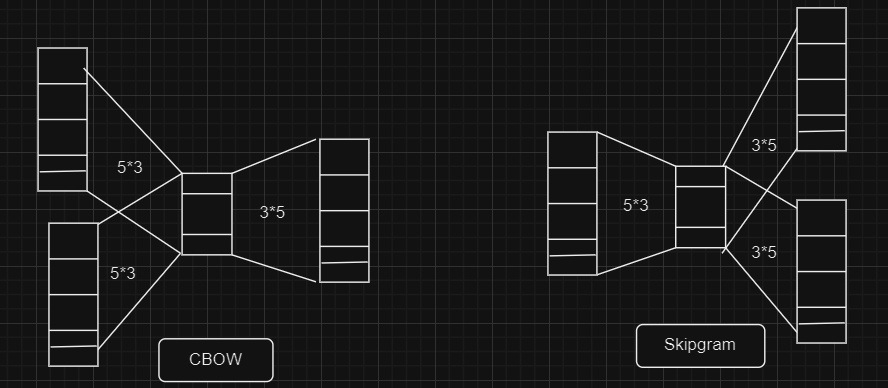

### Improving Word2Vec Performance

To enhance Word2Vec performance:
- **Increase Training Data**: Use larger datasets to train the model more effectively.
- **Increase Vector Dimensions**: Higher-dimensional embeddings capture more semantic nuances but require more computational resources.
- **Expand Context Window**: Enlarging the context window captures broader semantic relationships but increases training time.

### Conclusion

CBOW provides an efficient method for learning word embeddings by predicting a target word from its context. It is suitable for smaller datasets due to its faster training time compared to Skipgram. By optimizing parameters like training data size, vector dimensions, and context window, CBOW can be tailored to specific NLP tasks, enhancing its effectiveness in various applications such as text classification and information retrieval.


<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Word2Vec using pretrained weights on Google news dataset</div>

In [69]:
!pip install gensim

In [70]:
import gensim
from gensim.models import Word2Vec,KeyedVectors

In [71]:
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [72]:
glove_vectors = gensim.downloader.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


##### I used twitter dataset with 25 dimension because simply it is lightweight but to use google news dataset you can change `glove-twitter-25` to `word2vec-google-news-300`

In [73]:
glove_vectors['cricket']

array([ 0.48169 , -0.066325, -0.44454 , -1.7274  , -1.0247  , -0.78493 ,
        0.50351 , -0.65595 ,  0.56451 , -0.03321 , -0.14383 ,  0.71937 ,
       -2.8215  ,  0.86131 ,  0.79783 , -0.49762 ,  0.044193, -0.24435 ,
        0.051926,  1.0575  , -1.1741  ,  0.84042 ,  0.35934 , -1.0306  ,
       -0.69021 ], dtype=float32)

In [74]:
glove_vectors.most_similar('batman')

[('thor', 0.9278313517570496),
 ('potter', 0.9092318415641785),
 ('superman', 0.9090892672538757),
 ('spiderman', 0.9049674868583679),
 ('gangnam', 0.8759423494338989),
 ('hobbit', 0.8744966387748718),
 ('transformers', 0.869874119758606),
 ('bob', 0.8696601390838623),
 ('barney', 0.8690288662910461),
 ('disney', 0.8650587201118469)]

In [75]:
glove_vectors.most_similar('facebook')

[('twitter', 0.9480050802230835),
 ('google', 0.9231430888175964),
 ('instagram', 0.9184155464172363),
 ('internet', 0.914387583732605),
 ('youtube', 0.9113808274269104),
 ('tumblr', 0.9077149033546448),
 ('link', 0.8995786905288696),
 ('fb', 0.8734270334243774),
 ('post', 0.8671452403068542),
 ('site', 0.8642723560333252)]

In [76]:
glove_vectors.doesnt_match(['cofee','batman','superman'])

'cofee'

In [77]:
glove_vectors.similarity('man','woman')

0.76541775

<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Creating our own Word2Vec Model using words from Harry Potter Book ;)</div>

In [78]:
import numpy as np
import pandas as pd

In [79]:
import gensim
import os

from nltk import sent_tokenize
from gensim.utils import simple_preprocess

story = []
for filename in os.listdir('/kaggle/input/harry-potter-books'):
    
    f = open(os.path.join('/kaggle/input/harry-potter-books',filename))
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))


In [80]:
len(story)

66127

In [81]:
model = gensim.models.Word2Vec(
    window=20,
    min_count=2 #sentence with atleast 2 words
)

model.build_vocab(story)
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(4030243, 5322610)

In [82]:
model.wv.most_similar('voldemort')

[('sirius', 0.7364509701728821),
 ('dumbledore', 0.7269067764282227),
 ('terrible', 0.7203235030174255),
 ('represented', 0.7128353118896484),
 ('happiest', 0.6928020119667053),
 ('curse', 0.6837748885154724),
 ('excursion', 0.6722544431686401),
 ('collapses', 0.6658406853675842),
 ('power', 0.6604688167572021),
 ('riddle', 0.6558032035827637)]

In [83]:
model.wv.doesnt_match(['voldemort','harry','dumbledore','hermione','draco'])

'hermione'

In [84]:
model.wv['wizard']

array([ 0.42764577,  1.5804254 ,  0.27993912, -0.494846  , -0.5903137 ,
       -0.493986  , -0.06687483,  0.37737358, -1.1149967 , -1.3661267 ,
       -0.74059397,  0.61731565, -0.0609291 ,  0.57109714, -0.36382288,
        0.20868967,  0.05833538,  0.16313551, -0.3120054 ,  0.16230683,
        0.26014084,  0.7049772 ,  1.5123868 , -0.3036891 , -1.4621837 ,
       -0.08584081, -1.2955095 ,  0.42927617, -0.11821412,  0.6317364 ,
        0.1503151 , -0.58347017, -0.7738892 ,  0.11486755,  0.7822014 ,
       -0.66429293, -0.55768996, -0.9977382 , -0.00446949, -0.67198914,
       -0.87501013,  0.6695676 ,  0.35986337, -0.881723  ,  0.00961218,
       -1.0795213 , -0.08896206, -1.0021367 ,  1.129276  ,  0.35873395,
       -0.47659078, -1.024828  , -0.45017934, -0.02047386,  0.37355813,
       -0.3981701 ,  0.89751977, -0.43423107, -0.02505606, -0.4617177 ,
        0.21431528, -0.565733  , -1.6209853 ,  0.32132506, -0.765701  ,
        0.14244601, -1.0951862 , -0.8305159 , -0.11688221,  0.73

In [85]:
model.wv.similarity('hermione','harry')

0.2855407

In [86]:
model.wv.similarity('wizard','magic')

0.6475879

In [87]:
model.wv.get_normed_vectors().shape

(14675, 100)

In [88]:
y = model.wv.index_to_key

In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X = pca.fit_transform(model.wv.get_normed_vectors())
X.shape

(14675, 3)

In [90]:
import pandas as pd
import plotly.express as px

# Select a range of rows from X and y
X_subset = X[100:300]  # Assuming X has at least 300 rows and 3 columns
y_subset = y[100:300]  # Ensure y has the same number of elements as the selected range in X

# Create a DataFrame from the subset of X
df = pd.DataFrame(X_subset, columns=['x', 'y', 'z'])

# Create the 3D scatter plot
fig = px.scatter_3d(df, x='x', y='y', z='z', color=y_subset)
fig.show()



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [91]:
#Finding out closest word to some particular word
import pandas as pd
import plotly.express as px

X_subset = X[100:300]  
y_subset = y[100:300]  
df = pd.DataFrame(X_subset, columns=['x', 'y', 'z'])

fig = px.scatter_3d(df, x='x', y='y', z='z', color=y_subset)

annotations = []
h_index = y_subset.index('mcgonagall')
annotations.append(dict(x=X_subset[h_index, 0], y=X_subset[h_index, 1], z=X_subset[h_index, 2],
                        text='mcgonagall', showarrow=True, arrowhead=1))

fig.update_layout(scene=dict(annotations=annotations))

fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Contextual Embeddings (Considering Order and Context of Words)</div>


**ELMo (Embeddings from Language Models):**
ELMo generates contextual word embeddings by learning from the internal states of a two-layer bidirectional LSTM, trained as a language model.

**BERT (Bidirectional Encoder Representations from Transformers) Embeddings:**
BERT produces contextual word embeddings where the vector representation of each word depends on the entire context in which it appears.

<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Sentence/Document Embeddings (Operating at Higher Granularity)</div>

**Doc2Vec:**
An extension of Word2Vec that generates dense vector representations for entire documents or paragraphs.

**Sentence-BERT:**
An adaptation of the BERT model to produce embeddings for complete sentences, capturing semantic meaning.

**Universal Sentence Encoder:**
A model designed to encode sentences into high-dimensional vectors, versatile for various downstream tasks.

<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Positional Embeddings (Encoding Position of Words in a Sequence)</div>

**Absolute Positional Embeddings:**
Utilized in Transformer models, these embeddings encode the absolute position of each word in a sentence, preserving sequential order information.

**Relative Positional Embeddings:**
These embeddings encode the relative positions between pairs of words, focusing on the distance between two words rather than their absolute positions. Implemented in models like Transformer-XL and T5.

**Rotary Positional Embeddings (RoPE - Rotary Positional Encoding):**
A form of relative positional encoding employing rotation operations to encode relative positions. Found in models such as the Routing Transformer and RoFormer.


<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Rotary Positional Encoding</div>

Rotary Positional Encoding introduces positional information innovatively. Instead of traditional methods like addition or concatenation of positional data:

- **Rotation Mechanism:**
RoPE rotates word embeddings based on their positions within the sequence.

- **Uniform Distribution:**
This rotation ensures that positional information spreads uniformly across all dimensions of the embeddings.

- **Dynamic Scaling:**
Advanced variants of RoPE adjust rotation scaling dynamically based on sequence length, enhancing flexibility and performance.

This approach to positional encoding enhances the representation of word order and context, offering improvements over traditional absolute and relative methods in sequence modeling tasks.

#### I will implement all of its code over my next notebook

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0f7a7a; overflow:hidden"><b> RoPE Embedding (Rotary Positional Embedding)
</b></div>

# RoPE (Robust Positional Embeddings)


RoPE (Robust Positional Embeddings) plays a crucial role in models like Llama 2 and PaLM, enhancing the representation of token positions in sequence modeling. Currently, RoPE demonstrates superior performance or parity with other positional encoding techniques.

### Understanding RoPE

RoPE integrates Absolute and Relative Positional Embeddings (PEs), leveraging their respective strengths while mitigating drawbacks:

- **Absolute Application**: RoPE assigns each token an "absolute position index," creating positioned versions of query (q) and key (k) vectors based on their absolute positions.
  
- **Key Insight**: Positional information is introduced by rotating vectors using rotation matrices defined by:

  \[
  \begin{bmatrix}
  \cos \theta & -\sin \theta \\
  \sin \theta & \cos \theta \\
  \end{bmatrix}
  \]

  Here, ϴ is (angle of rotation) varies with the token's index  m, determining its position within the sequence.

- **Relative Outcome**: The rotational approach ensures that attention scores between q and k vectors remain relative. The choice of ϴ mirrors that of sinusoidal embeddings, where dot products decrease with token distance, preserving relative attention.

### Additional Points

- RoPE is applied exclusively to q and k vectors, influencing attention scores via dot products.
- Unlike sinusoidal embeddings added once at the initial layer, RoPE rotations are applied at every model layer.
- RoPE uniquely supports efficient attention mechanisms like Linear attention.


In [92]:
!pip install transformers

In [93]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import warnings
warnings.filterwarnings("ignore")

data = {
    'Index': ['D1', 'D2', 'D3', 'D4'],
    'Text': [
        'People Follow Mr.Beast',
        'Mr.Beast Follow Mr.Beast',
        'People Write comment',
        'Mr.Beast Write comment'
    ],
    'Output': [1, 1, 0, 0]
}

df = pd.DataFrame(data)
df



,Index,Text,Output
0,D1,People Follow Mr.Beast,1
1,D2,Mr.Beast Follow Mr.Beast,1
2,D3,People Write comment,0
3,D4,Mr.Beast Write comment,0


In [94]:
# Initialize Tokenizer and Model
model_name = "textattack/roberta-base-imdb"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Tokenize the text data
tokenized = df['Text'].apply(lambda x: tokenizer.encode(x, truncation=True, padding=True))

# Determine the maximum length of tokenized texts
max_length = max(len(tokens) for tokens in tokenized)

# Pad the sequences to the maximum length
input_ids = [tokens + [0]*(max_length - len(tokens)) for tokens in tokenized]
attention_mask = [[1]*len(tokens) + [0]*(max_length - len(tokens)) for tokens in tokenized]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/559 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at textattack/roberta-base-imdb were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [95]:
# Convert to PyTorch tensors
input_ids = torch.tensor(input_ids)
attention_mask = torch.tensor(attention_mask)

# Ensure PyTorch is imported and used correctly
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits  # logits for each class

# Combine logits with the original DataFrame
logits_df = pd.DataFrame(logits.numpy(), columns=model.config.id2label.values())
df_final = pd.concat([df[['Index', 'Output']], logits_df], axis=1)

# Print the final DataFrame
print("Final DataFrame with logits:")
df_final

Final DataFrame with logits:


,Index,Output,LABEL_0,LABEL_1
0,D1,1,0.486207,-0.373656
1,D2,1,0.531132,-0.424243
2,D3,0,-0.385834,0.162914
3,D4,0,0.948603,-1.162095


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0f7a7a; overflow:hidden"><b> Training and prediction using ML models
</b></div>

# Training and prediction

In [96]:
import numpy as np
import pandas as pd
temp_df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df = temp_df.iloc[:15000]
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [97]:
df.size

30000

In [98]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [99]:
df.duplicated().sum()

39

In [100]:
df.drop_duplicates(inplace=True)

In [101]:
import re
from nltk.corpus import stopwords
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text
df['review'] = df['review'].apply(remove_tags)

sw_list = stopwords.words('english')
df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

df['review'] = df['review'].apply(lambda x:x.lower())

In [102]:
X = df.iloc[:,0:1]
y = df['sentiment']

In [103]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train.shape

(11968, 1)

In [105]:
# Applying BoW
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

X_train_bow.shape

(11968, 57305)

<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Training with GaussianNB</div>

In [106]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train_bow,y_train)

GaussianNB()

In [107]:
y_pred = gnb.predict(X_test_bow)

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.6625459405278984

In [108]:
confusion_matrix(y_test,y_pred)

array([[1144,  359],
       [ 651,  839]])

<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Training with Random Forest Classifier</div>

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8559973270965586

In [110]:
cv = CountVectorizer(max_features=3000)

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8399599064483796

In [111]:
cv = CountVectorizer(ngram_range=(1,2),max_features=5000)

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8429669228199131


<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra"> Using TF-IDF</div>

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

X_train_tfidf = tfidf.fit_transform(X_train['review']).toarray()
X_test_tfidf = tfidf.transform(X_test['review'])

In [113]:
rf = RandomForestClassifier()

rf.fit(X_train_tfidf,y_train)
y_pred = rf.predict(X_test_tfidf)

accuracy_score(y_test,y_pred)

0.8456398262612763


<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra"> Using Word2vec</div>

In [114]:
import gensim
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
story = []
for doc in df['review']:
    raw_sent = sent_tokenize(doc)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))
    
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [115]:
model.build_vocab(story)
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(9196521, 9810805)

In [116]:
len(model.wv.index_to_key)

38121

In [117]:
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.wv.index_to_key]
    return np.mean(model.wv[doc], axis=0)

document_vector(df['review'].values[0])

array([-0.15012558,  0.29646325, -0.05944732,  0.03517027,  0.0711743 ,
       -0.4956361 ,  0.38317698,  0.6955456 , -0.19955903, -0.26425067,
        0.02961121, -0.54090315, -0.07585699,  0.3309967 , -0.04295598,
       -0.3966318 ,  0.01440811, -0.29557598, -0.0744672 , -0.5594967 ,
        0.3788567 ,  0.22596708,  0.35087064,  0.23180966,  0.08538827,
       -0.0546511 , -0.21992533, -0.20468377, -0.22094643,  0.0021175 ,
        0.43813905,  0.11721764,  0.16979796, -0.21172228, -0.02118742,
        0.58741105,  0.05489436, -0.30460715, -0.07082049, -0.64248985,
        0.28815025, -0.30169258,  0.11074074,  0.05080377,  0.1139256 ,
       -0.05827345, -0.27296644, -0.2586981 ,  0.03947353,  0.13238874,
        0.15341794, -0.28562286, -0.08849838, -0.03222168, -0.2521474 ,
       -0.07533234,  0.28020367, -0.0428473 , -0.589024  ,  0.04488266,
        0.11373525,  0.06789341,  0.13762495, -0.06170122, -0.51975673,
        0.182875  , -0.04792721,  0.19029057, -0.6066071 ,  0.28

In [118]:
from tqdm import tqdm
X = []
for doc in tqdm(df['review'].values):
    X.append(document_vector(doc))

100%|██████████| 14961/14961 [10:20<00:00, 24.11it/s]


In [119]:
X = np.array(X)
X[0]

array([-0.15012558,  0.29646325, -0.05944732,  0.03517027,  0.0711743 ,
       -0.4956361 ,  0.38317698,  0.6955456 , -0.19955903, -0.26425067,
        0.02961121, -0.54090315, -0.07585699,  0.3309967 , -0.04295598,
       -0.3966318 ,  0.01440811, -0.29557598, -0.0744672 , -0.5594967 ,
        0.3788567 ,  0.22596708,  0.35087064,  0.23180966,  0.08538827,
       -0.0546511 , -0.21992533, -0.20468377, -0.22094643,  0.0021175 ,
        0.43813905,  0.11721764,  0.16979796, -0.21172228, -0.02118742,
        0.58741105,  0.05489436, -0.30460715, -0.07082049, -0.64248985,
        0.28815025, -0.30169258,  0.11074074,  0.05080377,  0.1139256 ,
       -0.05827345, -0.27296644, -0.2586981 ,  0.03947353,  0.13238874,
        0.15341794, -0.28562286, -0.08849838, -0.03222168, -0.2521474 ,
       -0.07533234,  0.28020367, -0.0428473 , -0.589024  ,  0.04488266,
        0.11373525,  0.06789341,  0.13762495, -0.06170122, -0.51975673,
        0.182875  , -0.04792721,  0.19029057, -0.6066071 ,  0.28

In [120]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(df['sentiment'])
y

array([1, 1, 1, ..., 0, 0, 1])

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7935182091546943

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0f7a7a; overflow:hidden"><b> Parts of Speech Tagging
</b></div>

# POS Tagging


#### In simple terms, POS tagging (Part-of-Speech tagging) in NLP (Natural Language Processing) is the process of labeling each word in a sentence with its appropriate part of speech, such as noun, verb, adjective, etc. In traditional grammar, a part of speech is a category of words that share similar grammatical properties.

### Applications of POS Tagging:

1. **Named Entity Recognition (NER)**: Identifying proper nouns in text and classifying them into predefined categories like names of people, organizations, locations, etc.
2. **Question Answering Systems**: Improving the accuracy of systems designed to answer questions by understanding the grammatical structure of sentences.
3. **Word Sense Disambiguation**: Determining the correct meaning of a word based on its context in a sentence, particularly when a word has multiple meanings.
4. **Chatbots**: Enhancing the conversational abilities of chatbots by helping them understand and generate grammatically correct responses.


<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Architectures in POS tagging</div>

## Hidden Markov Model (HMM) in POS Tagging

A Hidden Markov Model (HMM) is a statistical model used to represent systems that have observable events generated by hidden states. In the context of POS tagging, the observable events are the words in a sentence, and the hidden states are the corresponding parts of speech.

An HMM consists of the following components:

1. **States**: In POS tagging, these are the parts of speech (e.g., noun, verb, adjective).
2. **Observations**: The actual words in the text.
3. **Transition Probabilities**: The probabilities of transitioning from one state to another. For example, the probability of a noun being followed by a verb.
4. **Emission Probabilities**: The probabilities of a particular state (part of speech) generating a particular observation (word). For example, the probability of a noun being the word "cat".
5. **Initial Probabilities**: The probabilities of starting in each state.

The HMM helps in determining the most probable sequence of POS tags for a given sequence of words.

## Viterbi Algorithm in POS Tagging

The Viterbi Algorithm is a dynamic programming algorithm used to find the most likely sequence of hidden states (POS tags) that results in a sequence of observed events (words). It efficiently computes the best path through the states by keeping track of the highest probability of any path that reaches each state.

#### Steps of the Viterbi Algorithm:

1. **Initialization**: 
   - For each state, compute the probability of starting in that state and observing the first word.
   
2. **Recursion**: 
   - For each subsequent word, compute the probability of each state given the previous state's probabilities and the current word's emission probability. This involves:
     - Transitioning from each possible previous state to the current state.
     - Multiplying the highest probability of reaching the previous state by the transition probability to the current state and the emission probability of the current word.
     - Storing the highest probability for each state at each step.
   
3. **Termination**: 
   - Once all words have been processed, the algorithm finds the state with the highest probability at the last word.
   
4. **Backtracking**: 
   - To find the best sequence of states, the algorithm traces back through the stored probabilities, starting from the state with the highest probability at the last word and moving backwards.




<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra"> Hidden Markov Model</div>

Suppose we have a dataset with parts of speech: Verb (V), Noun (N), and Modal (M).

| Docs                       |
|----------------------------|
| Amit loves Kaggle          |
| Can Amit Google Kaggle     |
| Will Amanda Google Kaggle  |
| Amanda Loves Amit          |
| Will loves Google          |

In the first step, we need to label each word in the dataset with its part of speech. This is a supervised learning problem.

| Docs                       | POS                       |
|----------------------------|---------------------------|
| Amit loves Kaggle          | N      V        N         |
| Can Amit Google Kaggle     | M     N    V      N       |
| Will Amanda Google Kaggle  | M     N    V      N       |
| Amanda Loves Amit          | N      V        N         |
| Will loves Google          | N      V        N         |

Next, we calculate the emission probability.

| Word   | N    | M    | V    |
|--------|------|------|------|
| Amit   | 2    | 0    | 0    |
| Loves  | 0    | 0    | 3    |
| Kaggle | 3    | 0    | 0    |
| Google | 1    | 0    | 2    |
| Will   | 2    | 1    | 0    |
| Amanda | 2    | 0    | 0    |
| can    | 0    | 1    | 0    |

For each row and column, the value indicates the frequency of the word appearing as a specific part of speech. For example, "Amit" appeared as a noun in 2 places.

Now we convert these frequencies into probabilities.

| Word   | N    | M    | V    |
|--------|------|------|------|
| Amit   | 2/10 | 0    | 0    |
| Loves  | 0    | 0    | 3/5  |
| Kaggle | 3/10 | 0    | 0    |
| Google | 1/10 | 0    | 2/5  |
| Will   | 2/10 | 1/2  | 0    |
| Amanda | 2/10 | 0    | 0    |
| can    | 0    | 1/2  | 0    |

Next, we calculate the transition probability. We add "Start" and "End" to our dataset.

| Docs                                   |
|----------------------------------------|
| Start Amit loves Kaggle End            |
| Start Can Amit Google Kaggle End       |
| Start Will Amanda Google Kaggle End    |
| Start Amanda Loves Amit End            |
| Start Will loves Google End            |

We now have:

| Transition | N    | M    | V    | End  |
|------------|------|------|------|------|
| Start      | 3    | 2    | 0    | 0    |
| N          | 0    | 0    | 5    | 5    |
| M          | 2    | 0    | 0    | 0    |
| V          | 5    | 0    | 0    | 0    |

Converting these to probabilities:

| Transition | N    | M    | V    | End  |
|------------|------|------|------|------|
| Start      | 3/5  | 2/5  | 0    | 0    |
| N          | 0    | 0    | 5/10 | 5/10 |
| M          | 2/2  | 0    | 0    | 0    |
| V          | 5/2  | 0    | 2/5  | 0    |

This means, for example, the probability of starting with a noun is 3/5.

Imagine the parts of speech as a network where each state (N, V, M) is connected, and words are mapped to their POS with associated probabilities.

For prediction, say we have "Will will Google Kaggle".

We know the POS sequence will be M, N, V, N.

| Docs                                   |
|----------------------------------------|
| Start Will Will Google Kaggle End      |

Initially, we label all words as nouns.

| Docs                                   | POS                |
|----------------------------------------|---------------------|
| Start Will Will Google Kaggle End      | Start N N N N End   |

Calculate probabilities step by step:

- Start-N: Transition probability 3/5 and "Will" emission probability 1/2
- N-N: Transition probability 0 and "Will" emission probability 1/5
- N-N: Transition probability 0 and "Google" emission probability 1/10
- N-N: Transition probability 0 and "Kaggle" emission probability 3/10
- N-End: Transition probability 3/10

Try another sequence, N N N M:

- Start-N: Transition probability 3/5 and "Will" emission probability 1/2
- N-N: Transition probability 0 and "Will" emission probability 1/5
- N-N: Transition probability 0 and "Google" emission probability 1/10
- N-M: Transition probability 0 and "Kaggle" emission probability 1/2
- M-End: Transition probability 0

Test all combinations; in total, you will have (Number of parts of speech)^(number of words).

Choose the sequence with the highest total probability. For the correct sequence (M N V N):

- Start-M: Transition probability 2/5 and "Will" emission probability 1/2
- M-N: Transition probability 1 and "Will" emission probability 1/3
- N-V: Transition probability 1/2 and "Google" emission probability 2/5
- V-N: Transition probability 1 and "Kaggle" emission probability 3/10
- N-End: Transition probability 1/2

Multiplying these probabilities gives the highest value, indicating the most probable POS sequence.



<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra"> Viterbi Algorithm</div>

#### So for the above example we will be having

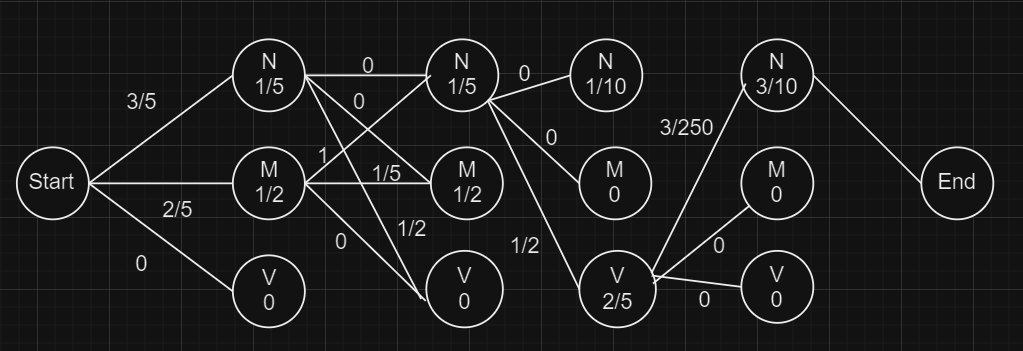

The Viterbi Algorithm allows us to explore various paths through a sequence while prioritizing the path with the highest probability. By maintaining and updating the maximum probabilities at each step, it ensures that paths with zero probabilities are avoided, as encountering a zero probability would render the entire path leading to it unusable. This method efficiently determines the most likely sequence of states or events in scenarios such as speech recognition or sequence labeling tasks.

In [122]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(u"I will google about facebook")

In [123]:
doc.text

'I will google about facebook'

In [124]:
doc[-1]

facebook

In [125]:
# course grained parts of speech
doc[2].pos_

'VERB'

In [126]:
#Fine grained parts of speech: Parts of speech with extra info
doc[2].tag_

'VB'

In [127]:
spacy.explain('VB')

'verb, base form'

In [128]:
for word in doc:
    print(word.text,"------>", word.pos_,word.tag_,spacy.explain(word.tag_))

I ------> PRON PRP pronoun, personal
will ------> AUX MD verb, modal auxiliary
google ------> VERB VB verb, base form
about ------> ADP IN conjunction, subordinating or preposition
facebook ------> NOUN NN noun, singular or mass


In [129]:
doc2 = nlp(u"I left the room")
for word in doc2:
    print(word.text,"------>", word.pos_,word.tag_,spacy.explain(word.tag_))

I ------> PRON PRP pronoun, personal
left ------> VERB VBD verb, past tense
the ------> DET DT determiner
room ------> NOUN NN noun, singular or mass


In [130]:
doc3 = nlp(u"to the left of the room")
for word in doc3:
    print(word.text,"------>", word.pos_,word.tag_,spacy.explain(word.tag_))

to ------> ADP IN conjunction, subordinating or preposition
the ------> DET DT determiner
left ------> NOUN NN noun, singular or mass
of ------> ADP IN conjunction, subordinating or preposition
the ------> DET DT determiner
room ------> NOUN NN noun, singular or mass


In [131]:
doc6 = nlp(u"The quick brown fox jumped over the lazy dog")
from spacy import displacy
displacy.render(doc6,style='dep',jupyter=True)

In [132]:
options={
    'distance':70,
    'compact':True,
    'color':'#fff',
    'bg':'#00a65a'
}
displacy.render(doc6,style='dep',jupyter=True,options=options)

### To be continued with deep learning techniques like GPT, BERT, Transformers, GRU, LSTM,RNN and CNN

### If this helped in your learning, then please Support – as they are the source of motivation!

### Happy Learning